## Model V1: Part 2 (Visualization)
In this part, I will try to see the patterns of each coefficient on explaining future volatilities.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
# This is the result of aggregating all stocks in that decile on that year into one model
Result_Agg = pd.read_csv('Model_V1_Result.csv', index_col = 0)
Result_Agg.head()

,lag_y,error_sq,error_signed
0,0.166473,0.019786,0.046546
1,0.405122,0.022260,-0.015842
2,0.386138,0.023640,-0.027845
3,0.438191,0.026434,-0.020816
4,0.416045,0.035442,0.072339


In [16]:
# This is the result of running model separately on each stock and combining the result using averaging
Result_Sep = pd.read_csv('Model_V1_Result_3.csv', index_col = 0)
Result_Sep.head()

,lag_y,error_sq,error_signed
0,0.024165,-0.041322,0.064926
1,0.035149,-0.011884,0.059621
2,0.016666,-0.026099,0.078390
3,0.017838,-0.016004,0.045015
4,0.025746,-0.023264,0.083716


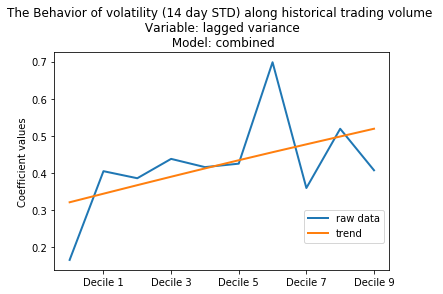

In [28]:
cycle, trend = sm.tsa.filters.hpfilter(Result_Agg['lag_y'], 1000)

IDX = [1, 3, 5, 7, 9]
fig, ax = plt.subplots()
l1 = ax.plot(Result_Agg['lag_y'], linewidth = 2)
l2 = ax.plot(trend, linewidth = 2)
plt.ylabel('Coefficient values')
plt.title('The Behavior of volatility (14 day STD) along historical trading volume \n Variable: lagged variance \n Model: combined')
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0]), ('raw data', 'trend'), bbox_to_anchor=(1, 0.3))

([<matplotlib.axis.XTick at 0x19a970eb788>,
 <a list of 5 Text xticklabel objects>)

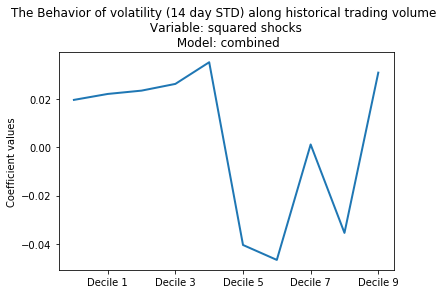

In [30]:
IDX = [1, 3, 5, 7, 9]
fig, ax = plt.subplots()
l1 = ax.plot(Result_Agg['error_sq'], linewidth = 2)
plt.ylabel('Coefficient values')
plt.title('The Behavior of volatility (14 day STD) along historical trading volume \n Variable: squared shocks \n Model: combined')
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))

([<matplotlib.axis.XTick at 0x19a944d0748>,
 <a list of 5 Text xticklabel objects>)

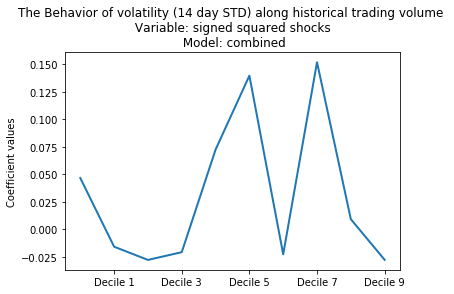

In [20]:
IDX = [1, 3, 5, 7, 9]
fig, ax = plt.subplots()
l1 = ax.plot(Result_Agg['error_signed'], linewidth = 2)
plt.ylabel('Coefficient values')
plt.title('The Behavior of volatility (14 day STD) along historical trading volume \n Variable: signed squared shocks \n Model: combined')
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))

([<matplotlib.axis.XTick at 0x19a94538248>,
 <a list of 5 Text xticklabel objects>)

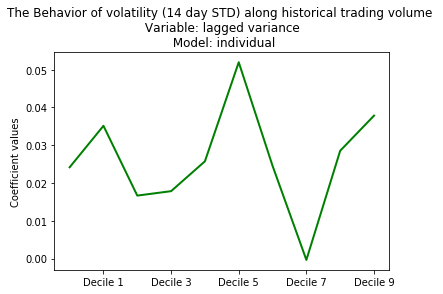

In [21]:
IDX = [1, 3, 5, 7, 9]
fig, ax = plt.subplots()
l1 = ax.plot(Result_Sep['lag_y'], linewidth = 2, color = 'green')
plt.ylabel('Coefficient values')
plt.title('The Behavior of volatility (14 day STD) along historical trading volume \n Variable: lagged variance \n Model: individual')
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))

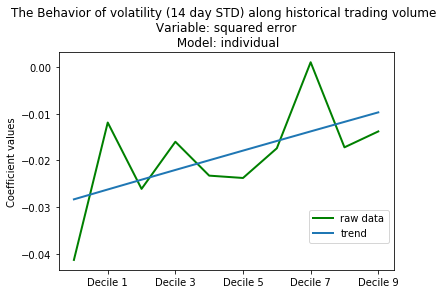

In [32]:
cycle, trend = sm.tsa.filters.hpfilter(Result_Sep['error_sq'], 1000)
IDX = [1, 3, 5, 7, 9]
fig, ax = plt.subplots()
l1 = ax.plot(Result_Sep['error_sq'], linewidth = 2, color = 'green')
l2 = ax.plot(trend, linewidth = 2)
plt.ylabel('Coefficient values')
plt.title('The Behavior of volatility (14 day STD) along historical trading volume \n Variable: squared error \n Model: individual')
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0]), ('raw data', 'trend'), bbox_to_anchor=(1, 0.3))

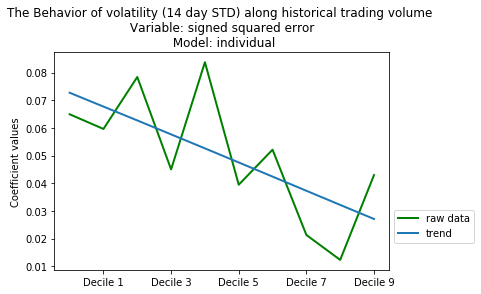

In [33]:
cycle, trend = sm.tsa.filters.hpfilter(Result_Sep['error_signed'], 1000)
IDX = [1, 3, 5, 7, 9]
fig, ax = plt.subplots()
l1 = ax.plot(Result_Sep['error_signed'], linewidth = 2, color = 'green')
l2 = ax.plot(trend, linewidth = 2)
plt.ylabel('Coefficient values')
plt.title('The Behavior of volatility (14 day STD) along historical trading volume \n Variable: signed squared error \n Model: individual')
plt.xticks(IDX, ('Decile 1', 'Decile 3', 'Decile 5', 'Decile 7', 'Decile 9'))
plt.legend((l1[0], l2[0]), ('raw data', 'trend'), bbox_to_anchor=(1, 0.3))

**Quick Observations**:  
- Looking at combined model, the only feature that we have found the pattern is lagged variance. Put simply, the more historical volume traded the stock has, the more evident volatility clustering effect. For squared shocks, the coefficient fluctuates around zero. For signed square errors, the coefficient fluctuates from slightly under zero to 0.15.  
- Looking at individual model, the two dominant features that we have found the pattern are squared shocks and signed squared shocks. For squared shocks, the more historical volume traded the stock has, the less that the shock could negatively impact the future volatilities. For signed square error, the more historical volume traded the stock has, the less that the stock could positively impact the future volatilities.